In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import metpy

In [3]:
path = '/data/keeling/a/sf20/b/WRF4_4/WRF/test/em_les/backup_input_soundings'

In [4]:
df = pd.read_csv(os.path.join(path, 'input_sounding'), skiprows=1, header=None, delim_whitespace=True)
df.columns = ['Height (m)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)', 'U (m/s)', 'V (m/s)']

grnd_data = pd.read_csv(os.path.join(path, 'input_sounding'),  header=None, nrows=1, delim_whitespace=True)
grnd_data.columns = ['Press (hPa)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)']

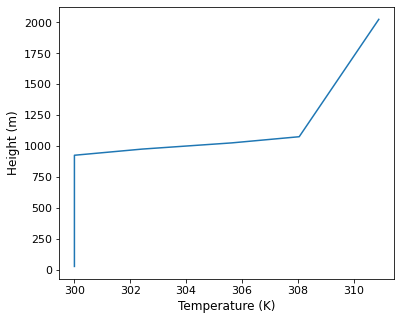

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(df['Potential Temp (K)'], df['Height (m)'])
ax.set_xlabel('Temperature (K)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=11)

plt.savefig('default_sounding.png', dpi=300)


If I have the water vapor mixing ratio (q), I can calculate the relative humidity by first solving for the saturation vapor pressure (function of T -> recover tempeature from potential temperature). We then know that qs (saturation specific humidity) is 0.622es /(p-0.378es), and RH can be expressed as (q/qs)*100%. 

In [61]:
from metpy.calc import dewpoint_from_specific_humidity
from metpy.units import units
result = dewpoint_from_specific_humidity(1000 * units.hPa, 10 * units.degC, 5 * units('g/kg'))

In [65]:
result.magnitude

3.7320319178791124

In [4]:
df

,Height (m),Potential Temp (K),Vapor Mix Ratio (g/kg),U (m/s),V (m/s)
0,25.0,300.00,10.0,0.0,0.0
1,75.0,300.00,10.0,0.0,0.0
2,125.0,300.00,10.0,0.0,0.0
3,175.0,300.00,10.0,0.0,0.0
4,225.0,300.00,10.0,0.0,0.0
5,275.0,300.00,10.0,0.0,0.0
6,325.0,300.00,10.0,0.0,0.0
7,375.0,300.00,10.0,0.0,0.0
8,425.0,300.00,10.0,0.0,0.0
9,475.0,300.00,10.0,0.0,0.0


In [5]:
grnd_data

,Press (hPa),Potential Temp (K),Vapor Mix Ratio (g/kg)
0,1000.0,305.0,14.0
